# Chapter 3 Classification Exercises:
* JONATHAN SHER

### Setup:
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Exercise 1:

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

* The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

In [ ]:
# import MNIST dataset and do some data exploration

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

# mnist.head()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Saving figure some_digit_plot


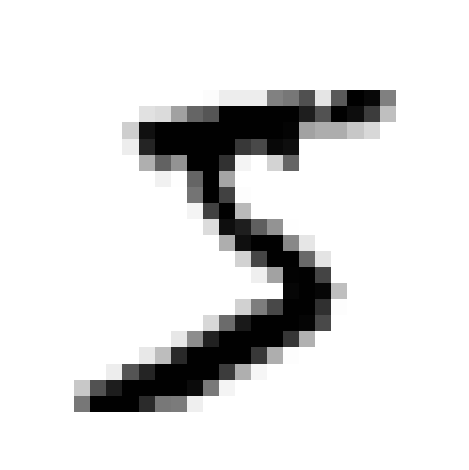

In [ ]:
X, y = mnist["data"], mnist["target"]
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [ ]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Preprocess the Data:
# The pixel values in the MNIST dataset range from 0 to 255. We'll normalize them to the range [0, 1].

X_train = X_train / 255.0
X_test = X_test / 255.0

# #Step 3: Perform Grid Search for Hyperparameter Tuning
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance']
# }

# # Initialize the KNeighborsClassifier
# knn_clf = KNeighborsClassifier()

# # Perform grid search
# grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=3)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the corresponding accuracy
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation accuracy:", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# Initialize the KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  23.8s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  24.8s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  26.5s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  24.9s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  25.3s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  25.2s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  28.7s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=  29.1s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  28.1s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  28.3s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.974 total time=  28.4s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation accuracy: 0.9720000000000001


* Evaluate the Best Model on the Test Set
* Once we have the best hyperparameters, we can evaluate the model on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

# Get the best model
best_knn_clf = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_knn_clf.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.9729


Our goal of achieving over 97% accuracy on the test set has been achieved with a test set accuracy of 97.29%